In [5]:

import sys
import os 
import fnmatch

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import axes 
from scipy.optimize import curve_fit 
from scipy.stats import norm
import numpy as np
current_directory = os.getcwd()
data_directory = current_directory+"\\extracted_data\\"
import pandas as pd
import uproot
# import track_time_calibration as ttc
from matplotlib import pyplot as plt
sys.path.insert(1, r'C:\Users\eliot\EPFL\TP4_ECAL\Code\ecal_reco\utils')
sys.path.insert(1, r'C:\Users\eliot\EPFL\TP4_ECAL\Code\ecal_reco\tracking')
from track import Track
from track3D import Track3D
from hit import Hit
from data_loading import *
from parameters import *
from tqdm import tqdm
from track_reconstruction import plot_hits
from physics import dist_line_rect
import pickle
from IPython import display
from time_correction import time_correction
# from find_muon_decay import find_muon_decay
from statistics import mean 

In [2]:
run ='run_000007'
data_storage = current_directory+"\\extracted_data\\"
raw_data_directory = "C:\\Users\\eliot\\EPFL\\TP4_ECAL\\raw_data\\"
df_hits_total, df_hits, og_len, new_len = load_run(raw_data_directory+run+"\\")
good_candidates = np.loadtxt(data_storage+"events_indices_"+run+".txt")

%matplotlib inline
tracks = []
for i in range(len(good_candidates)) :
    event = df_hits.loc[good_candidates[i]]
    next_event = df_hits_total.loc[good_candidates[i]+1]

    hits = [Hit(event,i) for i in range(event['n_hits' ])]
    # print (hits)    
    Track = Track3D(hits)
    tracks.append(time_correction(Track))
    # print(track)


   

C:\Users\eliot\EPFL\TP4_ECAL\raw_data\run_000007\data_0000.root
selected 74.62% of all events


In [6]:
x_offset = [[0]*8]*24
y_offset = [[0]*8]*24

len_tracks = len(tracks)
print(len_tracks)


for k in [1]: #number of iteration of the whole process

    variance = [None]*len_tracks
    sigma = [[0]*16]*24

    # for the x layers first : **************************************************

    for i in range(8) :  #itaration on the 8 x-layers
        for j in range(24) : # iteration on the 24 bars on each layers
            mu =[]
            t_dist=[]
            for t in range(len(tracks)) : #iteration on all the tracks selected

                if tracks[t].x.hits[i].coord[0]==j : #does the track goes through the j bar ?

                    t_track = [] #initialisation of the array with timestamp of other bars where the track goes through

                    t_bar =  tracks[t].x.hits[i].timestamp - x_offset[j][i] #initialisation of timestamp of bar i (xbar)
                    
                    # for z in (range(len(tracks[t].x.hits))) : #iteration on the 7 other x-layers 
                    for z in (range(8)) : #iteration on the 7 other x-layers 
                        if z != i : #we exclude the i layer
                            coordj = tracks[t].x.hits[z].coord[0]-1 #coordinate x where the track goes through on the z layer
                            t_track.append(tracks[t].x.hits[z].timestamp - x_offset[coordj][z]) 
                    for z in (range(8)) :  #iteration on the 8 other y-layers
                            coordj = tracks[t].y.hits[z].coord[0]-1 #coordinate y where the track goes through on the z layer
                            t_track.append(tracks[t].y.hits[z].timestamp - y_offset[coordj][z])
                        
                    t_track, variance[t] = norm.fit(t_track)
                    print(t_track_tot)
                    print(t_track-t_bar)
                    t_dist.append(t_track - t_bar)
                  

            # mu, sigma[j][i] = norm.fit(t_dist)

            # x_offset[j][i]= mu

    # **************************************************************************************************************

    # for the y layers now :

    for i in range(8) :  #itaration on the 8 x-layers
            for j in range(24) : # iteration on the 24 bars on each layers
                mu =[]
                t_dist=[]
                for t in range(len(tracks)) : #iteration on all the tracks selected

                    if tracks[t].y.hits[i].coord[0]==j : #does the track goes through the j bar ?

                        t_track = [] #initialisation of the array with timestamp of other bars where the track goes through

                        t_bar =  tracks[t].y.hits[i].timestamp - y_offset[j][i] #initialisation of timestamp of bar i (xbar)
                        
                        for z in (range(8)) : #iteration on the 7 other y-layers 
                            if z != i : #we exclude the i layer
                                coordj = tracks[t].y.hits[z].coord[0]-1 #coordinate y where the track goes through on the z layer
                                t_track.append(tracks[t].y.hits[z].timestamp - y_offset[coordj][z]) 
                        for z in range(8) :  #iteration on the 8 other x-layers
                                coordj = tracks[t].x.hits[z].coord[0]-1 #coordinate x where the track goes through on the z layer
                                t_track.append(tracks[t].x.hits[z].timestamp -x_offset[coordj][z]) 
                            
                        t_track_tot, variance[t] = norm.fit(t_track)
                        t_dist.append(t_track_tot - t_bar)

                # mu, sigma[j][i+8] = norm.fit(t_dist)

                # y_offset[j][i]= mu

            # *************************************************************************************************************

    # computation of variance of the algorithm for each process iteration k

    variance_tot = mean(variance)
    print(k+"_variance = " +variance)
    sigma_tot = mean(sigma)
    print(k+"_sigma = "+sigma)
    print(x_offset)
    print(y_offset)

   



10243
-1.0913693696981595
-0.0002820555951861259
-1.0913693696981595
0.3335441556141696
-1.0913693696981595
0.5906357416659227
-1.0913693696981595
-0.06600335168720761
-1.0913693696981595
0.08646046825456022
-1.0913693696981595
0.49169264327979395
-1.0913693696981595
-0.2792032983580488
-1.0913693696981595
0.3801831657621597
-1.0913693696981595
-0.29873609313847116
-1.0913693696981595
-0.08227535824775678
-1.0913693696981595
0.013023560718253613
-1.0913693696981595
0.32814835605356496
-1.0913693696981595
0.24373837094836737
-1.0913693696981595
0.20420884623350918
-1.0913693696981595
0.38147710022926334
-1.0913693696981595
0.06725679085813918
-1.0913693696981595
-0.38825823028588025
-1.0913693696981595
0.3851976144967254
-1.0913693696981595
0.14552689464003943
-1.0913693696981595
-0.6872216331473107
-1.0913693696981595
-0.28080143434736465
-1.0913693696981595
0.4646323408126827
-1.0913693696981595
-0.11621572075949804
-1.0913693696981595
-0.43105355344525104
-1.0913693696981595
0.001495

TypeError: unsupported operand type(s) for +: 'int' and 'str'

c:\Users\eliot\mambaforge\envs\ecal-env\Lib\site-packages\matplotlib\axes\_axes.py:6826: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\eliot\mambaforge\envs\ecal-env\Lib\site-packages\matplotlib\axes\_axes.py:6827: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

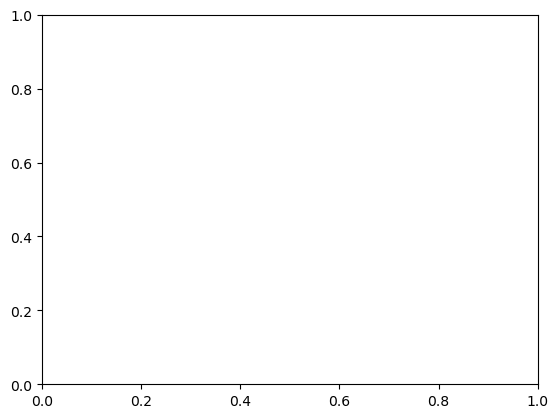

In [36]:
# for i in range(8) :  #itaration on the 8 x-layers
#   for j in range(24) : # iteration on the 24 bars on each layers
    ## Plot the histogram and gaussian fit ***************************************************
      # Plot the histogram
    plt.hist(t_dist, bins=25, density=True, alpha=0.6, color='g')
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma[23][15] )
    plt.plot(x, p, 'k', linewidth=2)
    # title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    # plt.title(title)

    plt.show() 
          #******